In [5]:
import sys
sys.path.append('./../')

import ikamoana.ikaseapodym as ikadym

from ikamoana.utils.feedinghabitatutils import seapodymFieldConstructor
from ikamoana.ikafish.ikafish import IkaFish, IkaFishDebug

In [6]:
configuration_filepath = "./../data/ikamoana_config/IkaSim_Example_Fish_025_30.xml"
my_sim = ikadym.IkaSeapodym(filepath=configuration_filepath)

In [7]:
my_sim.ika_params

{'start_distribution': '/home/ash/Documents/GitHub_Repositories/OFP-Ikamoana/data/ikamoana_data/',
 'seapodym_file': '/home/ash/Documents/GitHub_Repositories/OFP-Ikamoana/data/SEAPODYM_data/run-test/data/po_freeglorys_0.25x30d_1998_2019/skj_ref2018_freeglorys_reanalysis_025x30d_vgpm_Fref.xml',
 'forcing_dir': '/home/ash/Documents/GitHub_Repositories/OFP-Ikamoana/data/ikamoana_data/',
 'start_time': numpy.datetime64('2000-01-15'),
 'duration_time': 31104000,
 'delta_time': 172800,
 'output_delta_time': 172800,
 'spatial_limits': {'lonlim': (120.0, 290.0), 'latlim': (-40.0, 50.0)},
 'files_only': False,
 'forcing_files': ({}, {}),
 'fields_interp_method': 'nearest',
 'start_length': 26.43,
 'ageing_cohort': True,
 'number_of_cohorts': 1000,
 'start_dynamic_file': '/home/ash/Documents/GitHub_Repositories/OFP-Ikamoana/data/ikamoana_data/skj_age',
 'start_dynamic_file_extension': 'dym',
 'start_static_file': '/home/ash/Documents/GitHub_Repositories/OFP-Ikamoana/data/ikamoana_data/skj_age5.n

In [8]:
my_sim.loadFields()

 It will also add +1 to sigma_min. Cf. function documentation for more details.


/home/ash/Documents/GitHub_Repositories/OFP-Ikamoana/notebook/./../ikamoana/feedinghabitat/feedinghabitat.py:334: RuntimeWarning: overflow encountered in power
  1.0 / (1.0 + (np.power(gamma,(variable - o_star)))),
/home/ash/Documents/GitHub_Repositories/OFP-Ikamoana/notebook/./../ikamoana/feedinghabitat/feedinghabitat.py:334: RuntimeWarning: overflow encountered in power
  1.0 / (1.0 + (np.power(gamma,(variable - o_star)))),
/home/ash/Documents/GitHub_Repositories/OFP-Ikamoana/notebook/./../ikamoana/feedinghabitat/feedinghabitat.py:334: RuntimeWarning: overflow encountered in power
  1.0 / (1.0 + (np.power(gamma,(variable - o_star)))),
/home/ash/Documents/GitHub_Repositories/OFP-Ikamoana/notebook/./../ikamoana/feedinghabitat/feedinghabitat.py:334: RuntimeWarning: overflow encountered in power
  1.0 / (1.0 + (np.power(gamma,(variable - o_star)))),
/home/ash/Documents/GitHub_Repositories/OFP-Ikamoana/notebook/./../ikamoana/feedinghabitat/feedinghabitat.py:334: RuntimeWarning: overflow e

In [9]:
# my_sim.oceanToNetCDF("./../data/ikamoana_data", to_dataset=True)

In [10]:
my_sim.initializeParticleSet(particles_class=IkaFishDebug,
                             particles_number=1000,
                             method="start_cell")

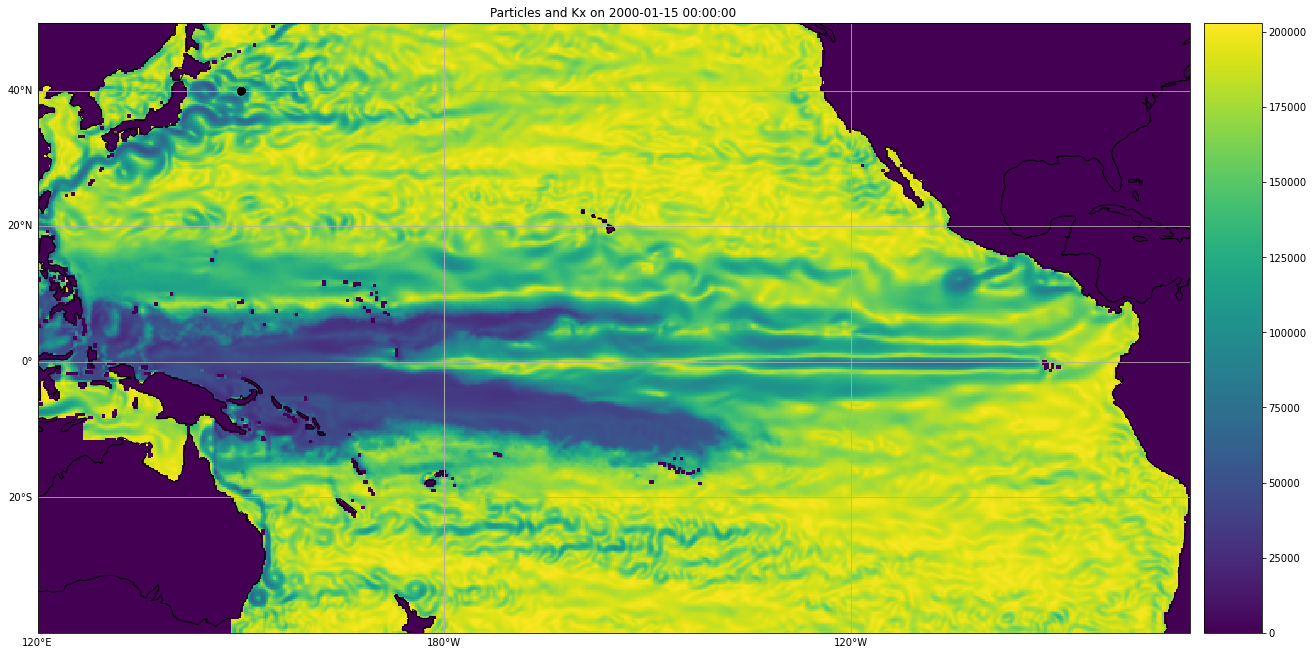

In [11]:
my_sim.fish.show(field=my_sim.ocean.Kx)

In [12]:
import parcels 
my_sim.runKernels(save=True)

INFO: Compiled ArrayIkaFishDebugCalcLonLatScalersIkAdvectionRK4TaxisRK4RandomWalkNonUniformDiffusionIkaDimMoveWithDiffusionRerollLandBlock ==> /tmp/parcels-1000/lib9ff2dcc0a0bc42b1df71b5a675ef590b_0.so
/home/ash/anaconda3/envs/ikamoana/lib/python3.9/site-packages/numpy/lib/arraysetops.py:270: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ar = np.asanyarray(ar)


In [13]:
len(my_sim.fish)

128

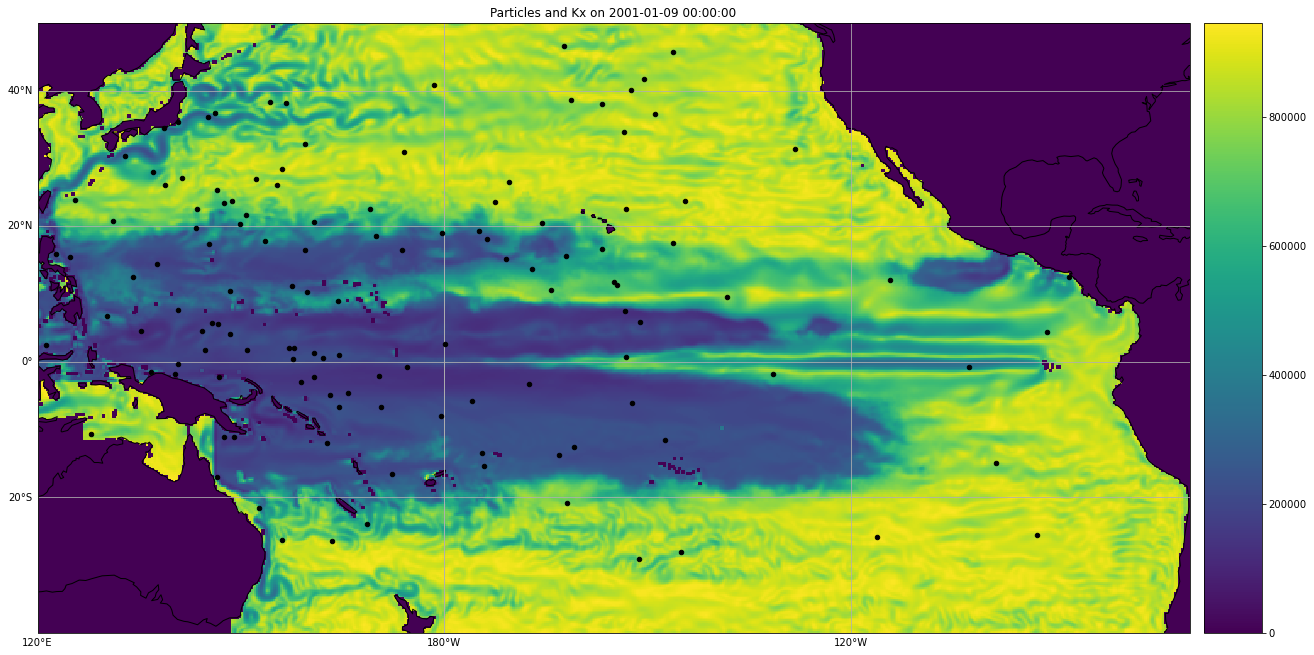

In [23]:
my_sim.fish.show(field=my_sim.ocean.Kx, with_particles=True)

---

In [15]:
# my_sim.fish.show(field=my_sim.ocean.dKx_dx, with_particles=True)

In [16]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [17]:
filepath = "./IkaSim_Example_025_30_particleFile.nc"
particle_file = xr.load_dataset(filepath)
particle_file

<xarray.Dataset>
Dimensions:       (traj: 1000, obs: 181)
Dimensions without coordinates: traj, obs
Data variables: (12/19)
    trajectory    (traj, obs) float64 0.0 0.0 0.0 0.0 0.0 ... nan nan nan nan
    time          (traj, obs) datetime64[ns] 2000-01-15 2000-01-17 ... NaT NaT
    lat           (traj, obs) float32 40.09 40.94 41.71 39.38 ... nan nan nan
    lon           (traj, obs) float32 150.1 147.8 148.0 143.0 ... nan nan nan
    z             (traj, obs) float32 0.0 0.0 0.0 0.0 0.0 ... nan nan nan nan
    Tx            (traj, obs) float32 0.0 -3.48e-05 0.0001179 ... nan nan nan
    ...            ...
    Cx            (traj, obs) float32 0.0 -1.758 -0.08066 -3.142 ... nan nan nan
    Cy            (traj, obs) float32 0.0 -0.2059 0.04543 -1.07 ... nan nan nan
    Ax            (traj, obs) float32 0.0 -0.331 -0.2445 0.03368 ... nan nan nan
    Ay            (traj, obs) float32 0.0 0.2155 0.04424 -0.1761 ... nan nan nan
    Rx_component  (traj, obs) float32 0.0 3.626e+05 3.978e+05 ... nan nan nan
    Ry_component  (traj, obs) float32 0.0 3.626e+05 3.978e+05 ... nan nan nan
Attributes:
    feature_type:           trajectory
    Conventions:            CF-1.6/CF-1.7
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_version:        2.3.0
    parcels_mesh:           spherical

In [18]:
mean_Dx = np.absolute(particle_file['Dx']).mean(axis=0)
mean_Dy = np.absolute(particle_file['Dy']).mean(axis=0)
mean_Cx = np.absolute(particle_file['Cx']).mean(axis=0)
mean_Ax = np.absolute(particle_file['Ax']).mean(axis=0)
mean_Tx = np.absolute(particle_file['Tx']).mean(axis=0)

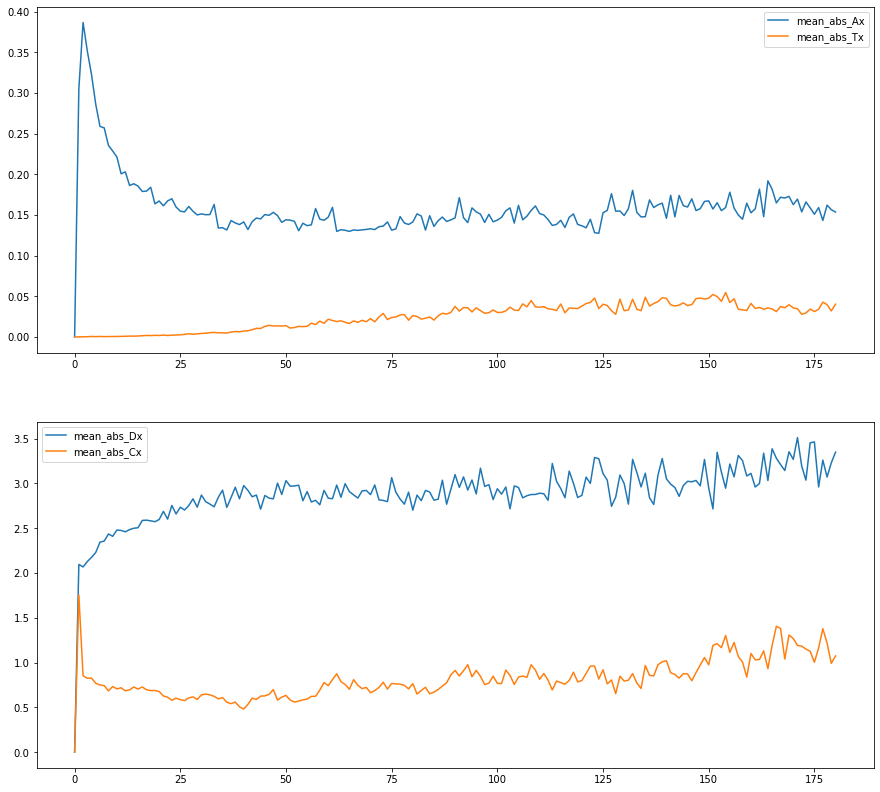

In [19]:
fig, (axe1, axe2) = plt.subplots(2,1,figsize=(15,14))

axe1.plot(mean_Ax)
axe1.plot(mean_Tx)
axe1.legend(["mean_abs_Ax","mean_abs_Tx"])

axe2.plot(mean_Dx)
axe2.plot(mean_Cx)
axe2.legend(["mean_abs_Dx","mean_abs_Cx"])

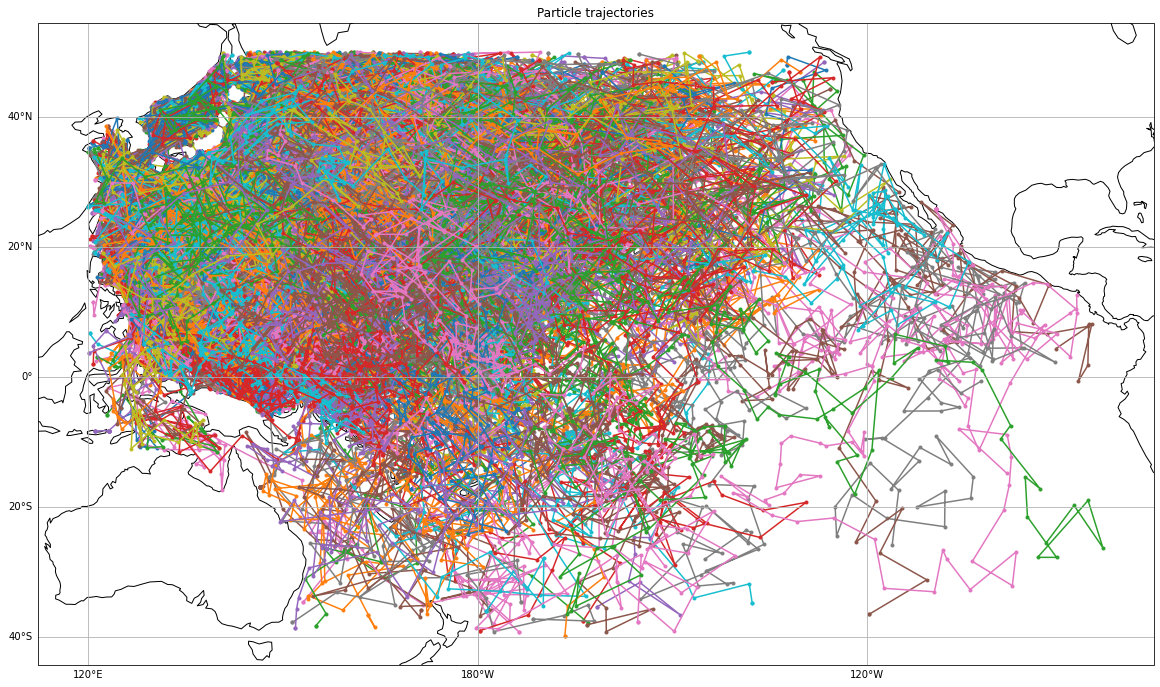

<Figure size 1440x1440 with 0 Axes>

In [20]:
from parcels import plotTrajectoriesFile

plot = plotTrajectoriesFile(filepath, show_plt=False, central_longitude=180)
plot.figure().set_size_inches([20,20])

In [21]:
my_sim.ocean.Kx